## Exploratory Analysis

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
%matplotlib inline
start_time = datetime.now()

### Data Description

The dataset contains real card transaction records from the year 2010 collected by a US government organization and sourced from Mark Nigrini, best known for applying Benford’s law in forensic accounting. The dataset consists of 96,753 rows (records) and 10 fields. Through the analysis of this dataset, transaction patterns and irregularities in these patterns can be identified that is the foundation of fraud detection algorithms.

In [2]:
data = pd.read_csv('card transactions.csv')

In [3]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# I notice that there are some sometimes blank columns read so I drop them
# I also want the Date field to be a date time
data.dropna(how='all', axis=1,inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [5]:
# Shape of dataset - number of records and fields
data.shape

(96753, 10)

In [6]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [7]:
# Time scale of data

print(data['Date'].max())
print(data['Date'].min())
print(data['Date'].max() -data['Date'].min())

2010-12-31 00:00:00
2010-01-01 00:00:00
364 days 00:00:00


In [8]:
# Type of Fields
data.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [9]:
type(data['Transtype'][0])

str

## Summary Tables

In [10]:
numerics = ['Date','Amount']
categoricals = ['Recnum','Cardnum','Merchnum','Merch description','Merch state','Merch zip','Transtype','Fraud']

In [11]:
stat_numeric_table = []
stat_categorical_table = []

def summary_table(col):
    if col in numerics:
        if str(data[col].dtypes) == 'datetime64[ns]':
            stat_numeric_table.append([col, 
                                   str(data[col].dtypes),
                                   data[col].count(), 
                                   '{:.2%}'.format(data[col].count()/data.shape[0]), 
                                   (data[col] == 0).sum(), 
                                   data[col].min(),
                                   data[col].quantile(0.25),
                                   data[col].quantile(0.5),
                                   data[col].quantile(0.75),
                                   data[col].max(),
                                   data[col].mean().round(freq='S'),
                                   data[col].mode()[0].round(freq='S'),
                                   data[col].std().round(freq='S')
                                  ])
        else:
            stat_numeric_table.append([col, 
                                str(data[col].dtypes),
                               data[col].count(), 
                               '{:.2%}'.format(data[col].count()/data.shape[0]), 
                               (data[col] == 0).sum(), 
                               data[col].min(),
                               data[col].quantile(0.25),
                               data[col].quantile(0.5),
                               data[col].quantile(0.75),
                               data[col].max(),
                               round(data[col].mean(),2),
                               round(data[col].mode()[0],2),
                               round(data[col].std(),2)
                              ])
        
    elif col in categoricals:
        stat_categorical_table.append([col,
                                       str(data[col].dtypes),
                                       data[col].count(),
                                       '{:.2%}'.format(data[col].count()/data.shape[0]),
                                       (data[col] == 0).sum(),
                                       data[col].nunique(),
                                       data[col].mode()[0]
                                      ])
    return

In [12]:
# Numeric Fields Table

for col in list(data.columns):
    summary_table(col)
    
numerics_df = pd.DataFrame(stat_numeric_table, columns=['Field Name', 'Field Type','# Records With Values', '% Populated', '# Zeros','Min', '25%', '50%', '75%', 'Max','Mean', 'Most Common','Stdev'])
numerics_df.to_csv('numerics.csv')
numerics_df

,Field Name,Field Type,# Records With Values,% Populated,# Zeros,Min,25%,50%,75%,Max,Mean,Most Common,Stdev
0,Date,datetime64[ns],96753,100.00%,0,2010-01-01 00:00:00,2010-04-03 00:00:00,2010-06-27 00:00:00,2010-09-12 00:00:00,2010-12-31 00:00:00,2010-06-25 22:21:52,2010-02-28 00:00:00,98 days 21:38:58
1,Amount,float64,96753,100.00%,0,0.01,33.48,137.98,428.2,3102045.53,427.89,3.62,10006.14


In [13]:
# Categorical Fields Table

categorical_df = pd.DataFrame(stat_categorical_table, columns=['Field Name', 'Field Type','# Records With Values', '% Populated', '# Zeros', '# Unique Values', 'Most Common'])
categorical_df.to_csv('categorical.csv')
categorical_df

,Field Name,Field Type,# Records With Values,% Populated,# Zeros,# Unique Values,Most Common
0,Recnum,int64,96753,100.00%,0,96753,1
1,Cardnum,int64,96753,100.00%,0,1645,5142148452
2,Merchnum,object,93378,96.51%,0,13091,930090121224
3,Merch description,object,96753,100.00%,0,13126,GSA-FSS-ADV
4,Merch state,object,95558,98.76%,0,227,TN
5,Merch zip,float64,92097,95.19%,0,4567,38118.0
6,Transtype,object,96753,100.00%,0,4,P
7,Fraud,int64,96753,100.00%,95694,2,0


In [14]:
'''import pandas_profiling
profile = pandas_profiling.ProfileReport(data)
profile.to_file('Data Summary.html')'''

"import pandas_profiling\nprofile = pandas_profiling.ProfileReport(data)\nprofile.to_file('Data Summary.html')"

In [15]:
goods = data[data['Fraud'] == 0]
bads = data[data['Fraud'] == 1]
print("# good transactions:", len(goods), "    # bad transactions:", len(bads))

# good transactions: 95694     # bad transactions: 1059


In [16]:
# Overall Fraud Rate

overall_fraud_rate = len(bads) / len(data)
print(f'Overall Fraud Rate: {overall_fraud_rate}')

Overall Fraud Rate: 0.010945397041952187


## Visualization of Each Field

### 1)	Field Name: Recnum
Description: Ordinal unique positive integer for each transaction record, from 1 to 96,753 that serves as an identifier for transactions primarily used for tracking purposes. Therefore, the number of unique values matches the range of this field/number of records in the dataset.

In [17]:
# # of unique values of Recnum

data['Recnum'].nunique()

96753

In [18]:
data['Recnum'].describe()

count    96753.000000
mean     48377.000000
std      27930.329635
min          1.000000
25%      24189.000000
50%      48377.000000
75%      72565.000000
max      96753.000000
Name: Recnum, dtype: float64

### 2)	Field Name: Cardnum

Description: Payer's debit/credit card number associated with a specific transaction record. This is considered as protected information given its sensitivity. This dataset contains 1,645 unique card numbers that were used for transaction, in many cases more than once. Cardnum is an important field in fraud analysis as it helps in identifying customer’s spending patterns and identify any outliers that may indicate suspicious activity and one of the parameters that is used to flag fraudulent transactions.

In [19]:
# # of Unique values of Cardnum

data['Cardnum'].nunique()

1645

In [20]:
data['Cardnum'].describe()

count    9.675300e+04
mean     5.142202e+09
std      5.567084e+04
min      5.142110e+09
25%      5.142152e+09
50%      5.142196e+09
75%      5.142246e+09
max      5.142847e+09
Name: Cardnum, dtype: float64

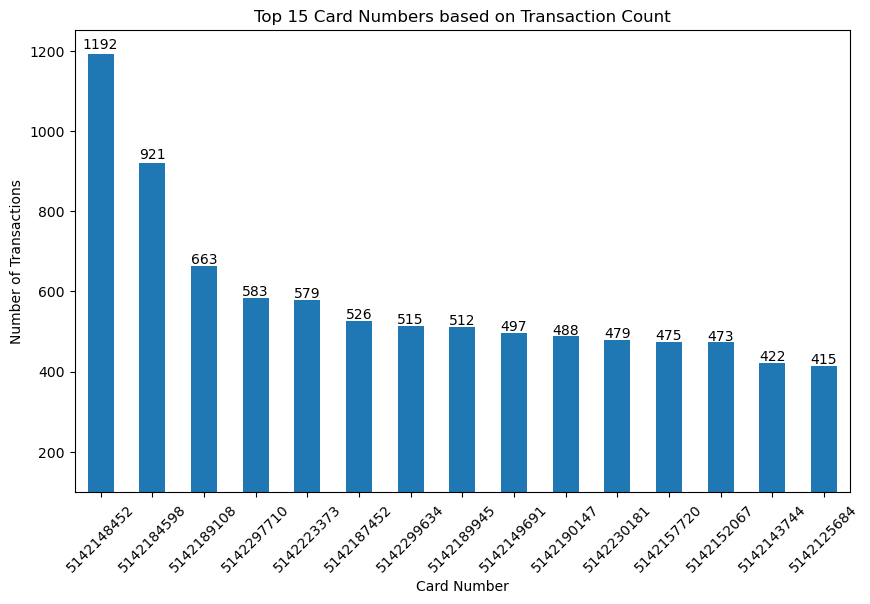

In [21]:
# Transaction count by card number

# print('Transaction count by card number')
# print(data.groupby('Cardnum')['Cardnum'].count())
# data.groupby('Cardnum')['Cardnum'].count()

plt.rcParams['font.size'] =  10
plt.rcParams["figure.figsize"] = (10,6)

data['Cardnum'].value_counts().head(15).plot(kind = 'bar', figsize=(10,6))
for i,j in enumerate(data['Cardnum'].value_counts().head(15)):
    plt.text(i,j*1.01,j,ha = 'center', fontsize = 10)
plt.ylim(bottom = 100)
plt.title('Top 15 Card Numbers based on Transaction Count')
plt.ylabel('Number of Transactions')
plt.xlabel('Card Number')
plt.xticks(rotation=45)
plt.show()

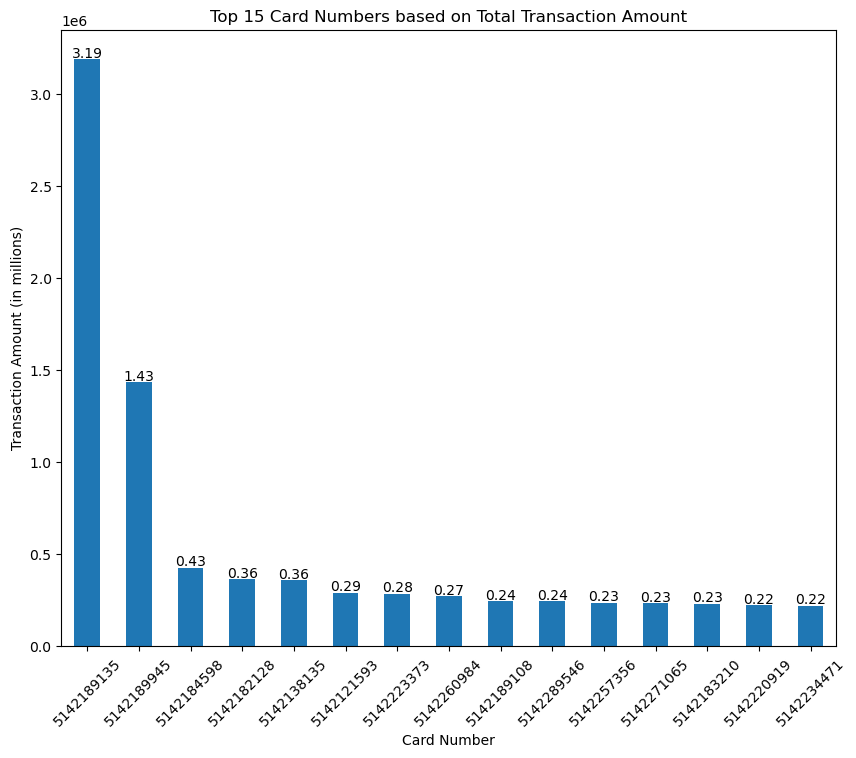

In [22]:
# Transaction amount by Card number
# print('Transaction amount by Card number')
# print(data.groupby('Cardnum')[['Amount']].sum().sort_values(by='Amount', ascending=False))

data.groupby('Cardnum')['Amount'].sum().sort_values(ascending=False).head(15).plot(kind='bar', figsize=(10,8))
for i,j in enumerate(data.groupby('Cardnum')['Amount'].sum().sort_values(ascending=False).head(15)):
    plt.text(i,j+10**4,round(j/10**6,2),ha = 'center', fontsize = 10)
plt.title('Top 15 Card Numbers based on Total Transaction Amount')
plt.ylabel('Transaction Amount (in millions)')
plt.xlabel('Card Number')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Fraudulent Transaction Count by Card Number
# print('Fraudulent Transaction Count by Card Number')
# bads.groupby(data['Cardnum'])['Fraud'].sum().reset_index(name='Count')

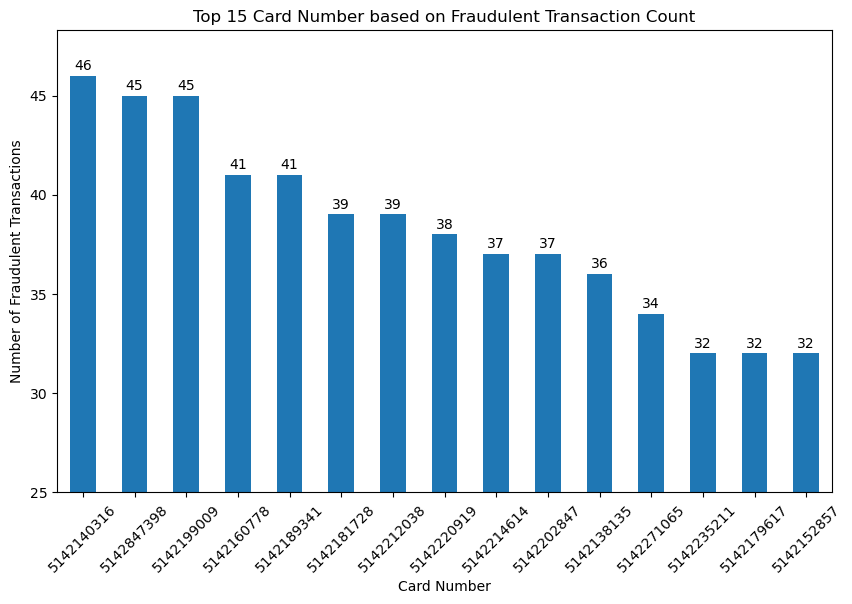

In [24]:
bads.groupby(data['Cardnum'])['Fraud'].sum().sort_values(ascending=False).head(15).plot(kind='bar')
for i,j in enumerate(bads.groupby(data['Cardnum'])['Fraud'].sum().sort_values(ascending=False).head(15)):
    plt.text(i,j+0.3,round(j,2),ha = 'center', fontsize = 10)
plt.title('Top 15 Card Number based on Fraudulent Transaction Count')
plt.ylabel('Number of Fraudulent Transactions')
plt.ylim(bottom = 25)
plt.xlabel('Card Number')
plt.xticks(rotation=45)
plt.show()

### 3)	Field Name: Date

Description: An ordinal field representing the transaction date. The values cover the entirety of the year 2010 with 365 unique values and range of the field being (2010-01-01, 2010-12-31). This field plays a significant role in identifying customer’s spending patterns with respect to time and providing a larger picture of significant trends that may occur in sizeable customer base.

In [25]:
# # Unique Values of Date

data['Date'].nunique()

365

In [26]:
# Frequency of Date
data['Date'].value_counts()

2010-02-28    684
2010-08-10    610
2010-03-15    594
2010-09-13    564
2010-09-07    536
             ... 
2010-11-07     11
2010-10-03     10
2010-01-16      9
2010-10-17      6
2010-12-26      6
Name: Date, Length: 365, dtype: int64

In [27]:
data['Date'].min(), data['Date'].max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2010-12-31 00:00:00'))

In [28]:
# Transaction Count and Sum by Date
data.groupby('Date').agg({'Amount': ['count', 'sum']})

Amount           
            count        sum
Date                        
2010-01-01     51    4162.04
2010-01-02     29    1948.65
2010-01-03    159   67832.60
2010-01-04    229   90389.94
2010-01-05    309  115861.10
...           ...        ...
2010-12-27    199   45817.52
2010-12-28    216  128959.97
2010-12-29    263  117657.06
2010-12-30    200   82393.91
2010-12-31     53   27756.75

[365 rows x 2 columns]

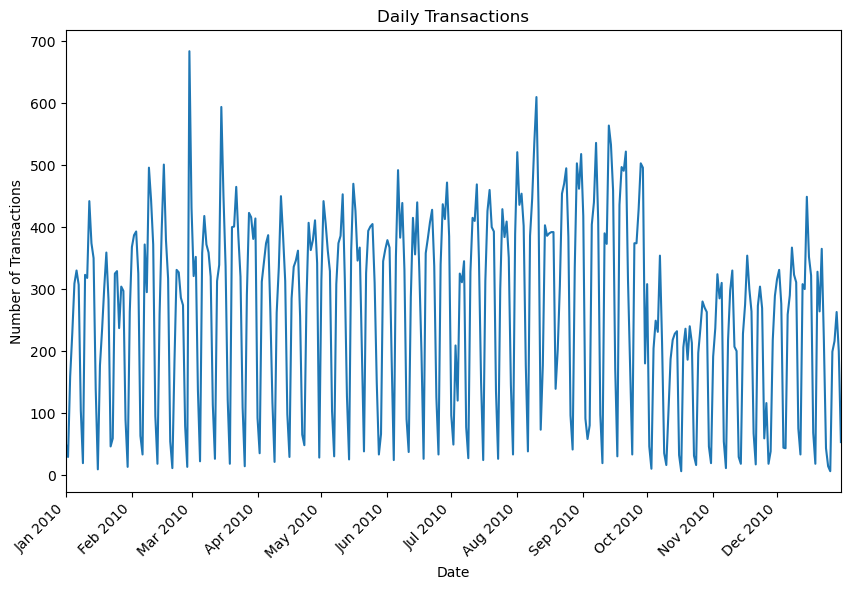

In [29]:
import matplotlib.dates as mdates

daily_count = data.set_index(data['Date']).resample(timedelta(days = 1)).count()['Amount']
daily_count.plot()
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transactions')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.minorticks_off()
plt.xticks(rotation=45,ha='right')
plt.show()


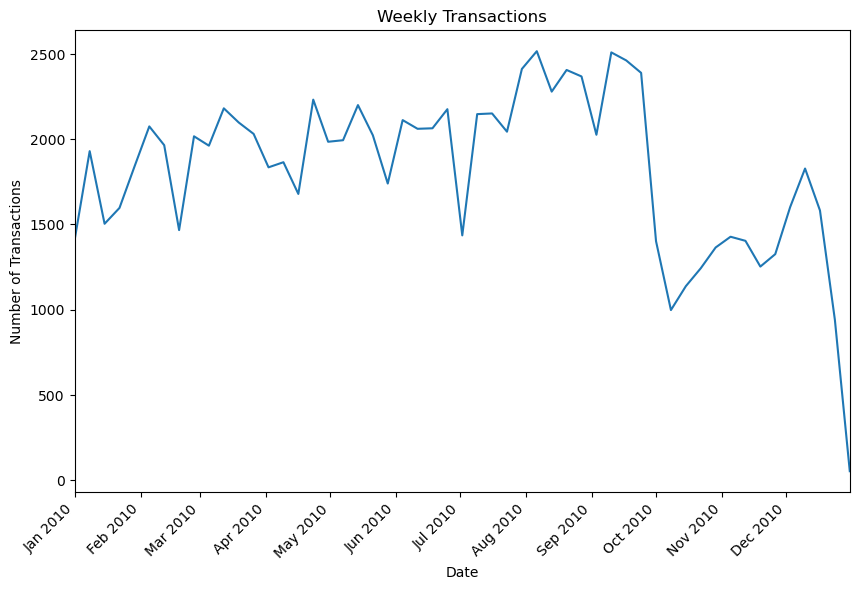

In [30]:
weekly_count = data.set_index(data['Date']).resample(timedelta(days = 7)).count()['Amount']
weekly_count.plot()
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Weekly Transactions')
ax = plt.gca()
ax.minorticks_off()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45,ha='right')
plt.show()

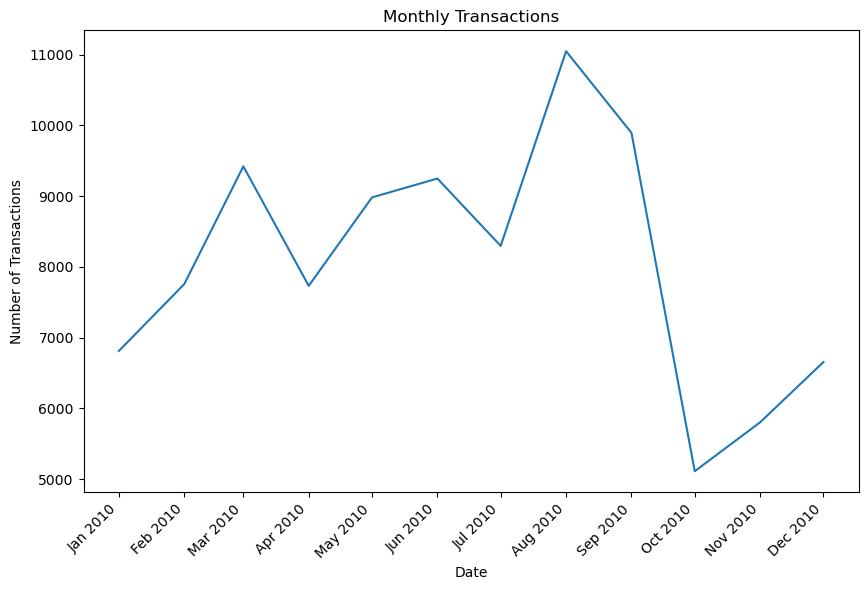

In [31]:
monthly_data = data.copy(deep=True)
monthly_data['Date'] = monthly_data['Date'].apply(lambda x: datetime.strftime(x, '%Y-%m'))
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])
monthly_count = monthly_data.groupby('Date')['Amount'].count()

plt.plot(monthly_count.index, monthly_count.values)
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transactions')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45,ha='right')
plt.show()

### 4)	Field Name: Merchnum
Description: Nominal field representing the merchant number associated with the transaction record serving as a unique identifier for each merchant. There are 13091 unique merchants in this dataset. Based on the merch num field, there are several plots that can be created that measure frequency of different transactions and total transaction amount.

In [32]:
print('# Unique Values: ', data['Merchnum'].nunique())
print('\nMerchant Number Frequency')
print(data['Merchnum'].value_counts())

# Transaction count by Merchant number
# print('Transaction count by Merchant number')
# print(data['Merchnum'].value_counts())

# Unique Values:  13091

Merchant Number Frequency
930090121224     9310
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
                 ... 
2000021670061       1
6731000199309       1
9813800006594       1
3065107420906       1
3500000006160       1
Name: Merchnum, Length: 13091, dtype: int64


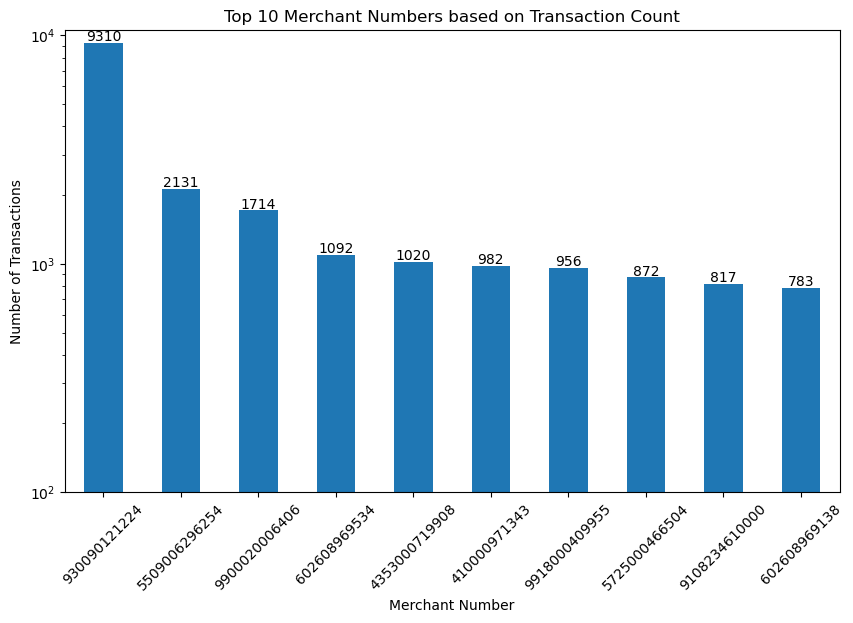

In [33]:
# Plots the top 15 merchant numbers based on transaction count. Given the significant different in the count values,
# log scale is employed to reduce the magnitude order of the counts.

data['Merchnum'].value_counts().head(10).plot(kind = 'bar')
plt.yscale('log')
plt.ylim(bottom = 100)
plt.title('Top 10 Merchant Numbers based on Transaction Count')
plt.xlabel('Merchant Number')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
for i,j in enumerate(data['Merchnum'].value_counts().head(10)):
    plt.text(i,j*1.02,j,ha = 'center', fontsize = 10)
plt.show()

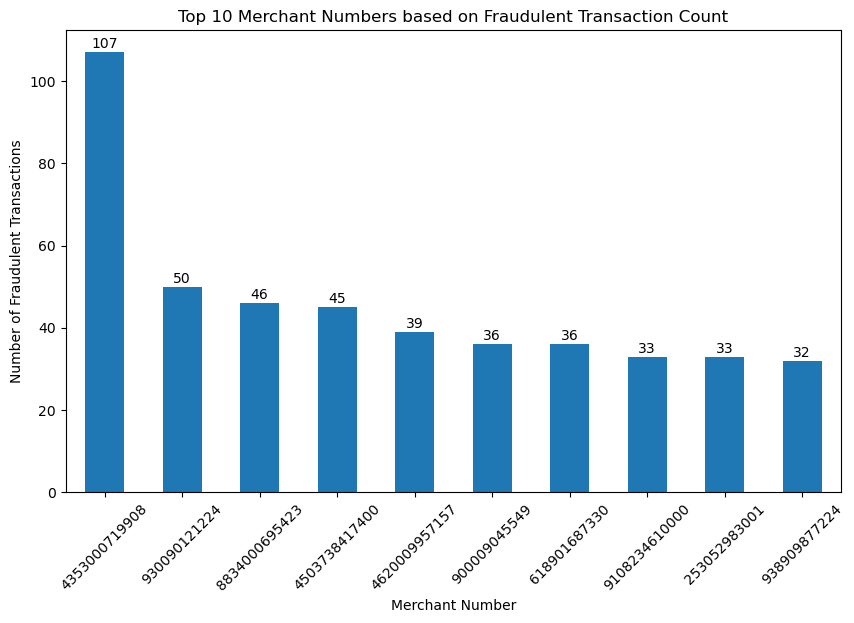

In [34]:
# Plots the top 10 merchant numbers based on fraudulent transaction counts

bads.groupby(data['Merchnum'])['Fraud'].sum().sort_values(ascending=False).head(10).plot(kind = 'bar')
for i,j in enumerate(bads.groupby(data['Merchnum'])['Fraud'].sum().sort_values(ascending=False).head(10)):
    plt.text(i,j+1,j,ha = 'center', fontsize = 10)
plt.title('Top 10 Merchant Numbers based on Fraudulent Transaction Count')
plt.xlabel('Merchant Number')
plt.xticks(rotation=45)
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

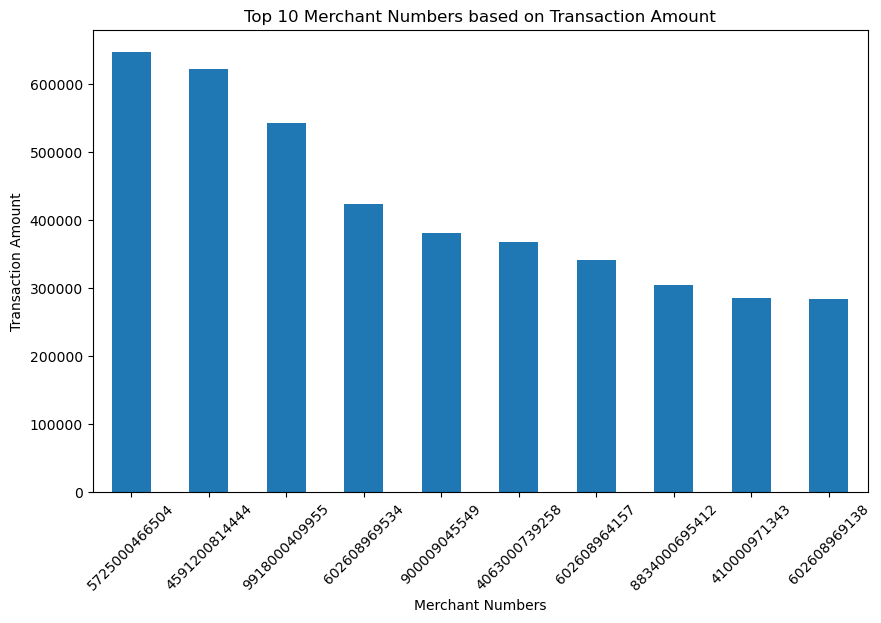

In [35]:
# Plots the top 15 merchant numbers based on amount involved in associated transactions
plt.rcParams.update({'font.size': 10})

data.groupby('Merchnum')['Amount'].sum().sort_values(ascending=False).head(10).plot(kind = 'bar')
#for i,j in enumerate(data.groupby('Merchnum')['Amount'].sum().sort_values(ascending=False).head(15)):
#    plt.text(i,j*1.02,round(j/10**6,2)*,ha = 'center', fontsize = 10)
plt.title('Top 10 Merchant Numbers based on Transaction Amount')
plt.xlabel('Merchant Numbers')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
#plt.text(fontsize = 10)
plt.show()


### 5)	Field Name: Merch description
Description: Represents additional information about the merchant associated with transaction that helps identifying the merchant. There are 13,126 unique merchant descriptions in this dataset. This field provides contextual information surrounding the transaction and overall spending patterns that assists in identifying any deviation and whether transaction in question is legitimate or not. 

In [36]:
# # Unique values of Merch description

data['Merch description'].nunique()

13126

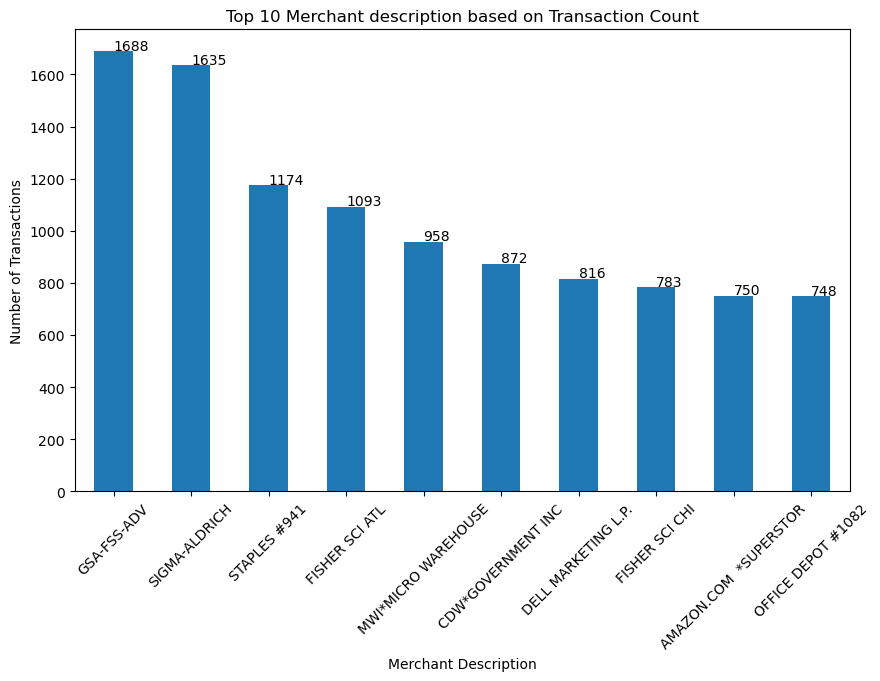

In [37]:
data['Merch description'].value_counts().head(10).plot(kind = 'bar')
#plt.yscale('log')
#plt.ylim(bottom = 100)
plt.title('Top 10 Merchant description based on Transaction Count')
plt.xlabel('Merchant Description')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
for i,j in enumerate(data['Merch description'].value_counts().head(10)):
    plt.text(i,j+6,j,fontsize = 10)
plt.show()

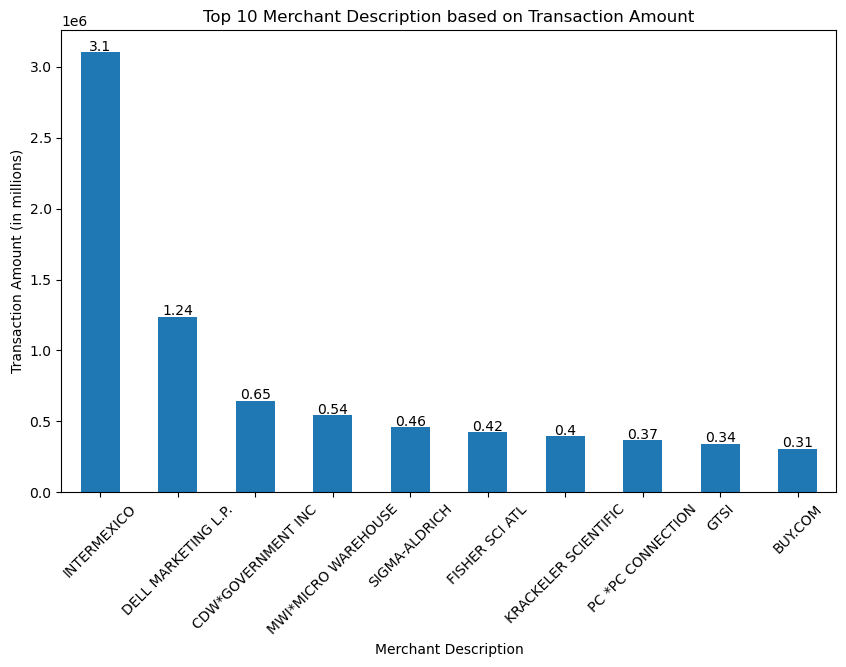

In [38]:
data.groupby('Merch description')['Amount'].sum().sort_values(ascending=False).head(10).plot(kind = 'bar')
#for i,j in enumerate(data.groupby('Merchnum')['Amount'].sum().sort_values(ascending=False).head(15)):
#    plt.text(i,j*1.02,round(j/10**6,2)*,ha = 'center', fontsize = 10)
plt.title('Top 10 Merchant Description based on Transaction Amount')
plt.xlabel('Merchant Description')
plt.ylabel('Transaction Amount (in millions)')
plt.xticks(rotation=45)
#plt.text(fontsize = 10)
for i,j in enumerate(data.groupby('Merch description')['Amount'].sum().sort_values(ascending=False).head(10)):
    plt.text(i,j+10**4,round(j/10**6,2),ha = 'center', fontsize = 10)
plt.show()

### 6)	Field Name: Merch state
Description: nominal field represents the state where the merchant is located. There are 227 unique values for Merchant state which provides an idea of the spread of the transactions in this dataset. This field helps in analyzing purchasing trends over geographical area across regions, major actors such as merchants in each region, ratio of fraudulent transaction count and overall transaction count per region and many more such patterns.

In [39]:
# # Unique values of Merch state

data['Merch state'].nunique()

227

In [40]:
data['Merch state'].value_counts()

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
       ...  
495        1
376        1
458        1
546        1
116        1
Name: Merch state, Length: 227, dtype: int64

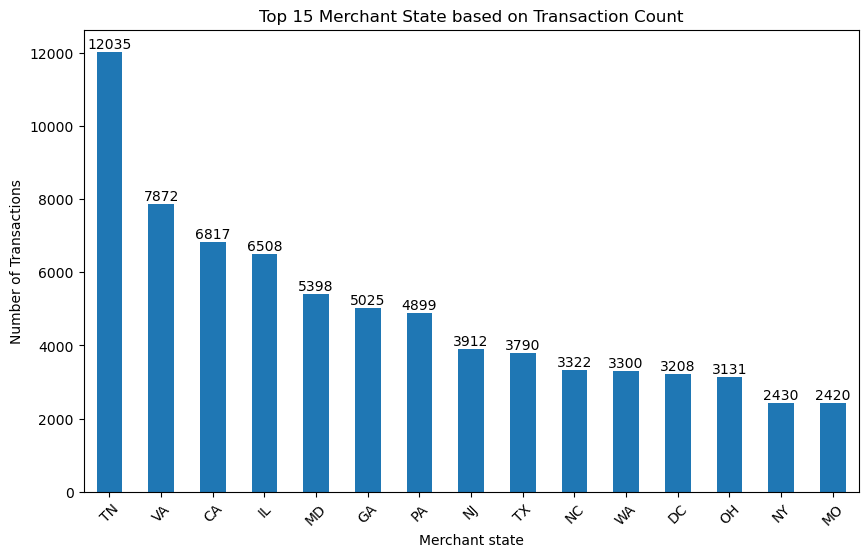

In [41]:
data['Merch state'].value_counts().head(15).plot(kind = 'bar')
#plt.yscale('log')
#plt.ylim(bottom = 100)
plt.title('Top 15 Merchant State based on Transaction Count')
plt.xlabel('Merchant state')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
for i,j in enumerate(data['Merch state'].value_counts().head(15)):
    plt.text(i,j+100,j,ha = 'center', fontsize = 10)
plt.show()

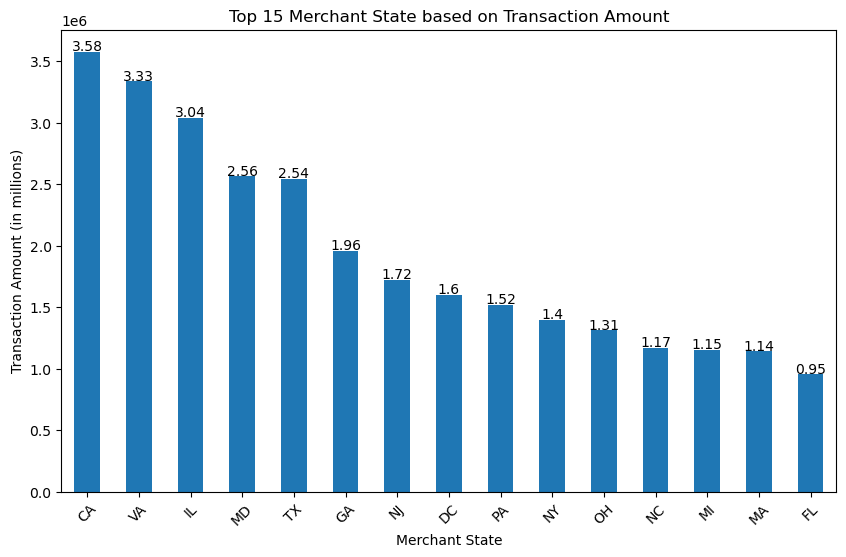

In [42]:
data.groupby('Merch state')['Amount'].sum().sort_values(ascending=False).head(15).plot(kind = 'bar')
#for i,j in enumerate(data.groupby('Merchnum')['Amount'].sum().sort_values(ascending=False).head(15)):
#    plt.text(i,j*1.02,round(j/10**6,2)*,ha = 'center', fontsize = 10)
plt.title('Top 15 Merchant State based on Transaction Amount')
plt.xlabel('Merchant State')
plt.ylabel('Transaction Amount (in millions)')
plt.xticks(rotation=45)
#plt.text(fontsize = 10)
for i,j in enumerate(data.groupby('Merch state')['Amount'].sum().sort_values(ascending=False).head(15)):
    plt.text(i,j+10**4,round(j/10**6,2),ha = 'center', fontsize = 10)
plt.show()

In [43]:
data.groupby('Merch state')['Amount'].sum().sort_values(ascending=False).head(15)

Merch state
CA    3576032.34
VA    3334617.03
IL    3037438.51
MD    2563586.00
TX    2543437.97
GA    1960173.60
NJ    1721005.49
DC    1600835.32
PA    1519510.37
NY    1396719.65
OH    1313226.18
NC    1167772.87
MI    1153517.03
MA    1140475.60
FL     954014.57
Name: Amount, dtype: float64

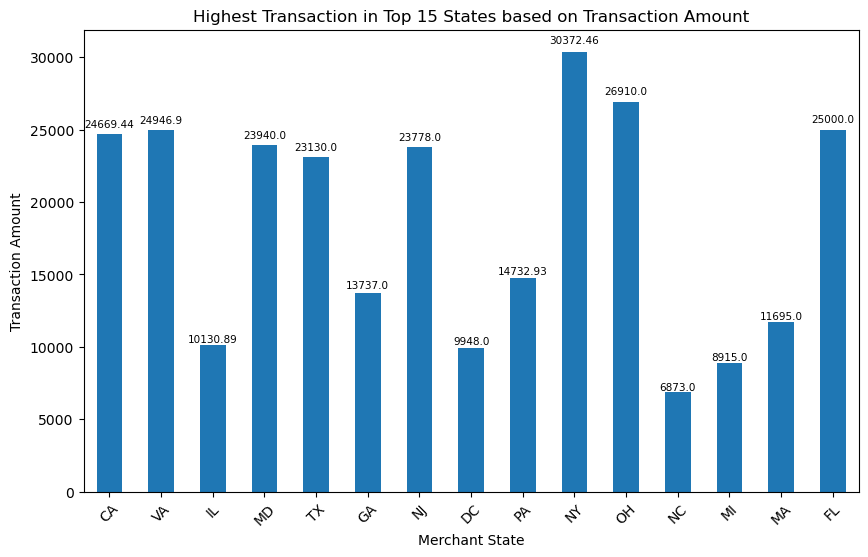

In [44]:
states = list(data.groupby('Merch state')['Amount'].sum().sort_values(ascending=False).head(15).index)

data[data['Merch state'].isin(states)].groupby('Merch state')['Amount'].max().reindex(states).plot(kind = 'bar')
#for i,j in enumerate(data.groupby('Merchnum')['Amount'].sum().sort_values(ascending=False).head(15)):
#    plt.text(i,j*1.02,round(j/10**6,2)*,ha = 'center', fontsize = 10)
plt.title('Highest Transaction in Top 15 States based on Transaction Amount')
plt.xlabel('Merchant State')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
#plt.text(fontsize = 10)
for i,j in enumerate(data[data['Merch state'].isin(states)].groupby('Merch state')['Amount'].max().reindex(states)):
    plt.text(i,j*1.02,j,ha = 'center', fontsize = 7.5)
plt.show()

### 7)	Field Name: Merch zip
Description: nominal field that represents the zip code of the region where merchant is located for a particular card transaction. This combined with merch state gives approximate geographical location of the merchant.

In [45]:
data['Merch zip'].nunique()

4567

In [46]:
data['Merch zip'] = data['Merch zip'].fillna('00000.0').astype(str)
data['Merch zip'] = data['Merch zip'].apply(lambda x: str(x)[:-2])

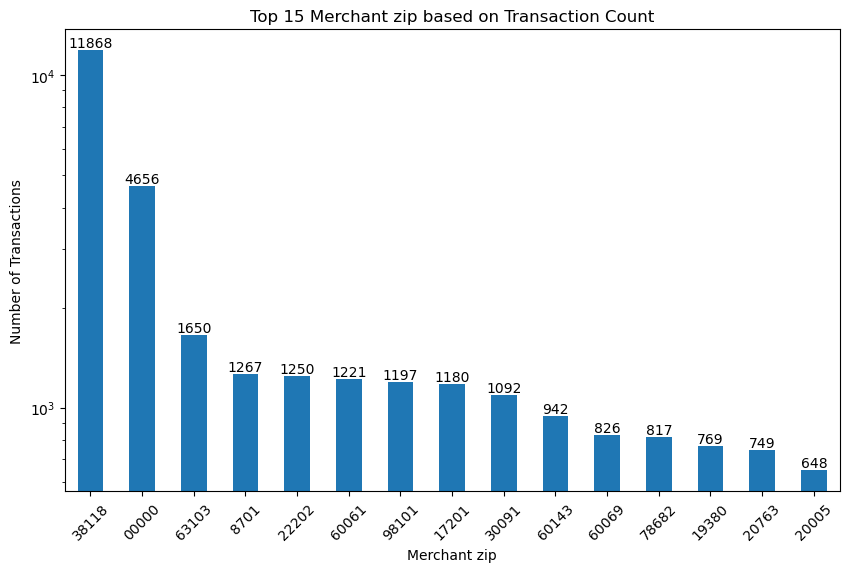

In [47]:
data['Merch zip'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
#plt.ylim(bottom = 100)
plt.title('Top 15 Merchant zip based on Transaction Count')
plt.xlabel('Merchant zip')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
for i,j in enumerate(data['Merch zip'].value_counts().head(15)):
    plt.text(i,j*1.02,j,ha = 'center', fontsize = 10)
plt.show()

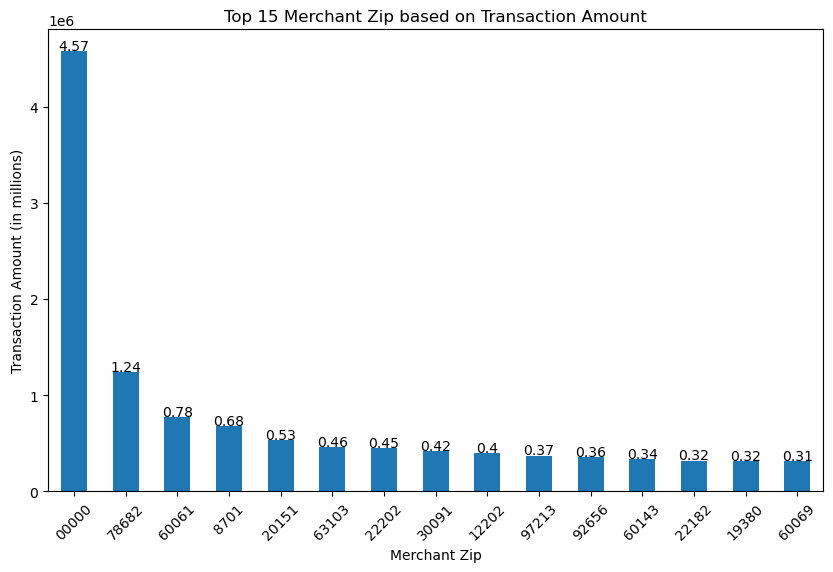

In [48]:
data.groupby('Merch zip')['Amount'].sum().sort_values(ascending=False).head(15).plot(kind = 'bar')
#for i,j in enumerate(data.groupby('Merchnum')['Amount'].sum().sort_values(ascending=False).head(15)):
#    plt.text(i,j*1.02,round(j/10**6,2)*,ha = 'center', fontsize = 10)
plt.title('Top 15 Merchant Zip based on Transaction Amount')
plt.xlabel('Merchant Zip')
plt.ylabel('Transaction Amount (in millions)')
plt.xticks(rotation=45)
#plt.text(fontsize = 10)
for i,j in enumerate(data.groupby('Merch zip')['Amount'].sum().sort_values(ascending=False).head(15)):
    plt.text(i,j+10**4,round(j/10**6,2),ha = 'center', fontsize = 10)
plt.show()

### 8)	Field Name: Transtype
Description: Nominal field that represents type of transaction whether it be purchase denoted by P or any other type of transaction.

In [49]:
# # Unique values of Transtype
data['Transtype'].nunique()

4

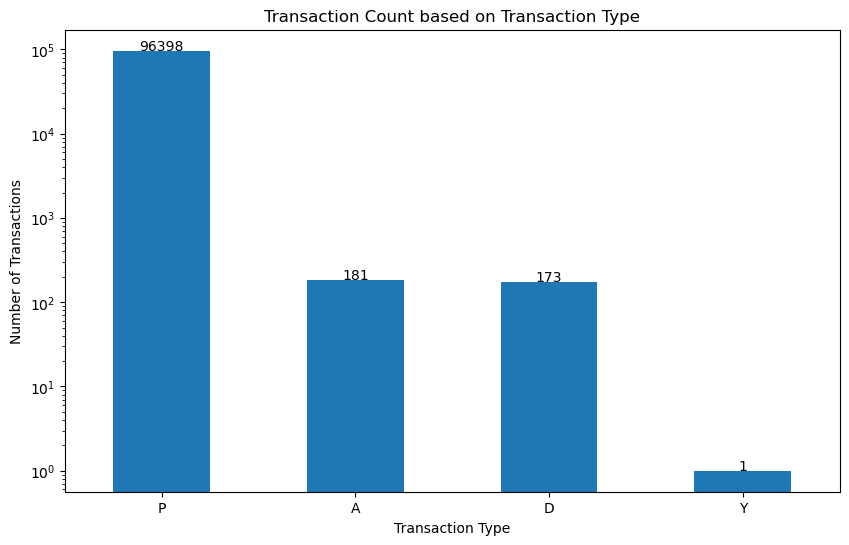

In [50]:
data['Transtype'].value_counts().plot(kind='bar')
plt.yscale('log')
#plt.ylim(bottom = 100)
plt.title('Transaction Count based on Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
for i,j in enumerate(data['Transtype'].value_counts()):
    plt.text(i,j*1.02,j,ha = 'center', fontsize = 10)

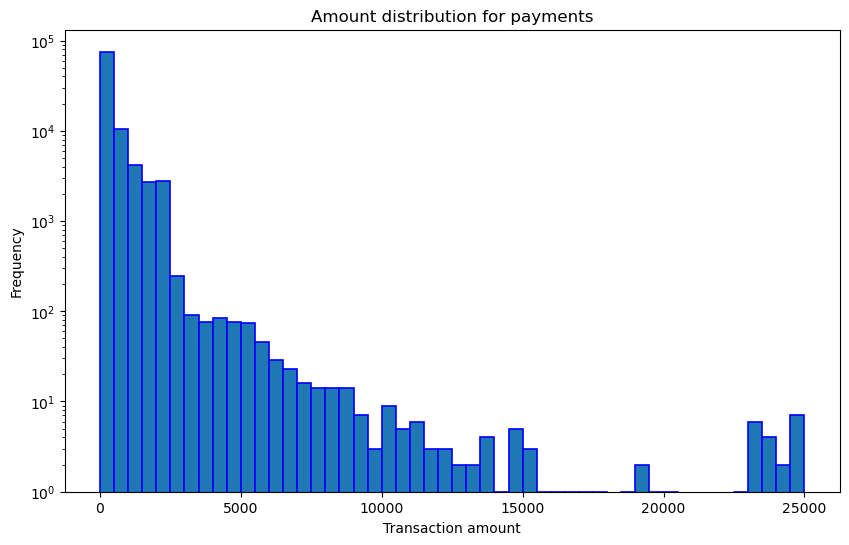

In [51]:
# Transaction Amount by Transtype
# print('Transaction Amount by Transtype')
# print(data.groupby('Transtype')['Amount'].sum())

plt.hist(data[data['Transtype'] == 'P']['Amount'],bins=50,range=[0,25000],edgecolor='blue',linewidth=1.2)
plt.yscale('log')
plt.ylim(bottom = 1)
plt.title('Amount distribution for payments')
plt.xlabel('Transaction amount')
plt.ylabel('Frequency')
plt.show()

### 9)	Field Name: Amount
Description: Ordinal field that refers to the amount involved in transactions. The range for this field is (0.01, 3102045.53). Amount is an important field as any outliers in value from this field indicate potentially fraudulent activity that requires further investigation.

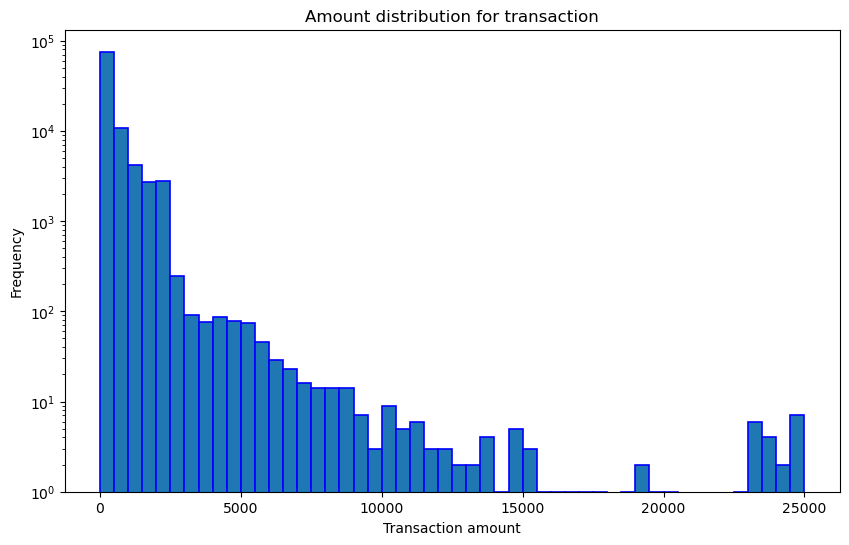

In [52]:
plt.hist(data['Amount'],bins=50,range=[0,25000],edgecolor='blue',linewidth=1.2)
plt.yscale('log')
plt.ylim(bottom = 1)
plt.title('Amount distribution for transaction')
plt.xlabel('Transaction amount')
plt.ylabel('Frequency')
plt.show()

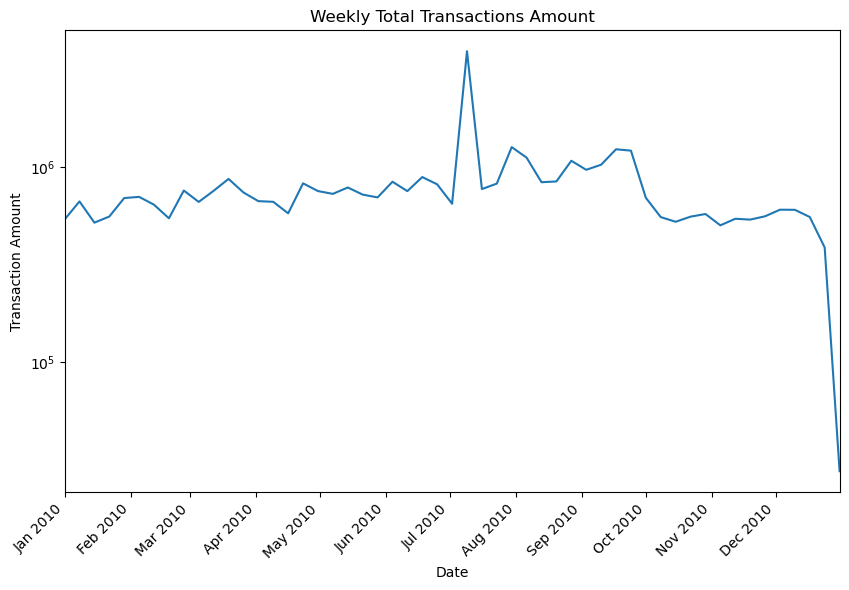

In [53]:
data.set_index(data['Date']).resample(timedelta(days = 7))['Amount'].sum().plot()
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.title('Weekly Total Transactions Amount')
plt.yscale('log')
ax = plt.gca()
ax.minorticks_off()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45,ha='right')
plt.show()

### 10) Fraud
Description: Fraud label field serves as an indicator that determines whether a transaction is fraudulent or not. Specifically, a value of 0 denotes a legitimate transaction, while a value of 1 denotes a fraudulent transaction
. In this dataset, 95,694 transactions are non-fraudulent, while the number of fraudulent transactions is 1,059.
This label is of particular importance for analyzing historic trends of fraudulent activities that can be leveraged to identify patterns using fraud detection algorithms as shown in the third plot.

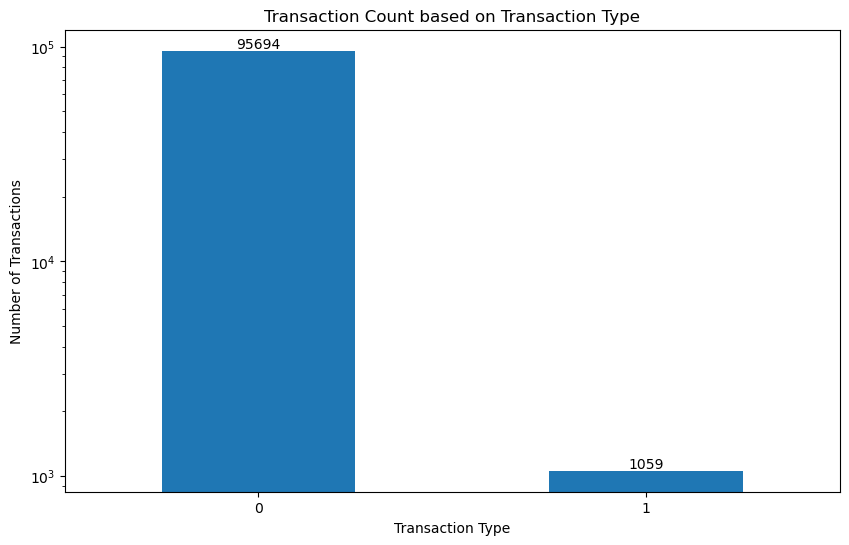

In [54]:
data['Fraud'].value_counts().plot(kind='bar')
plt.yscale('log')
plt.title('Transaction Count based on Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
for i,j in enumerate(data['Fraud'].value_counts()):
    plt.text(i,j*1.02,j,ha = 'center', fontsize = 10)

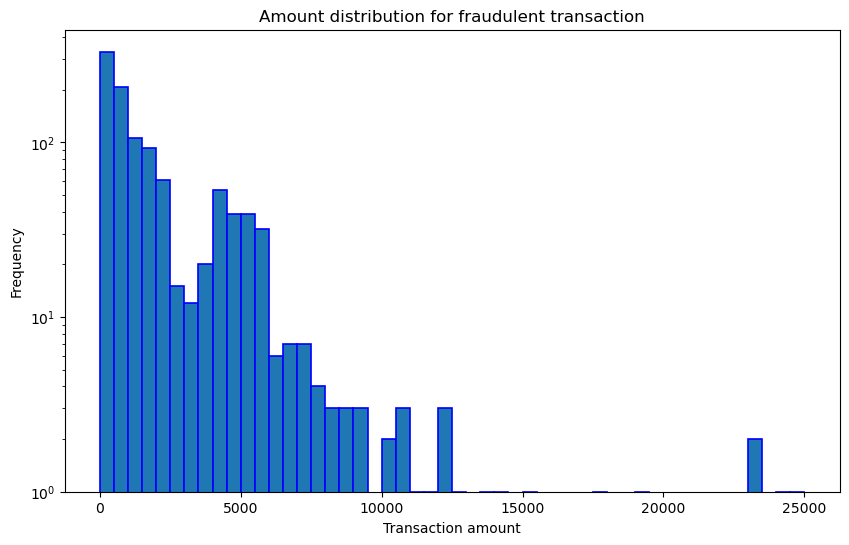

In [55]:
plt.hist(data[data['Fraud'] == 1]['Amount'],bins=50,range=[0,25000],edgecolor='blue',linewidth=1.2)
plt.yscale('log')
plt.ylim(bottom = 1)
plt.title('Amount distribution for fraudulent transaction')
plt.xlabel('Transaction amount')
plt.ylabel('Frequency')
plt.show()

### 	Data Exploration

In [56]:
data['DOW'] = data['Date'].dt.day_name()

In [57]:
# remove exclusions: only keep the type P's (payments) and remove one high transaction outlier that is a transaction made in Mexican pesos instead of US dollar causing the high numeric value.
temp = data[data['Transtype'] == 'P']
data = temp[temp['Amount'] <= 3000000]
data = data.reset_index(drop=True)
# print(data.shape)
print(data['Amount'].max())

47900.0


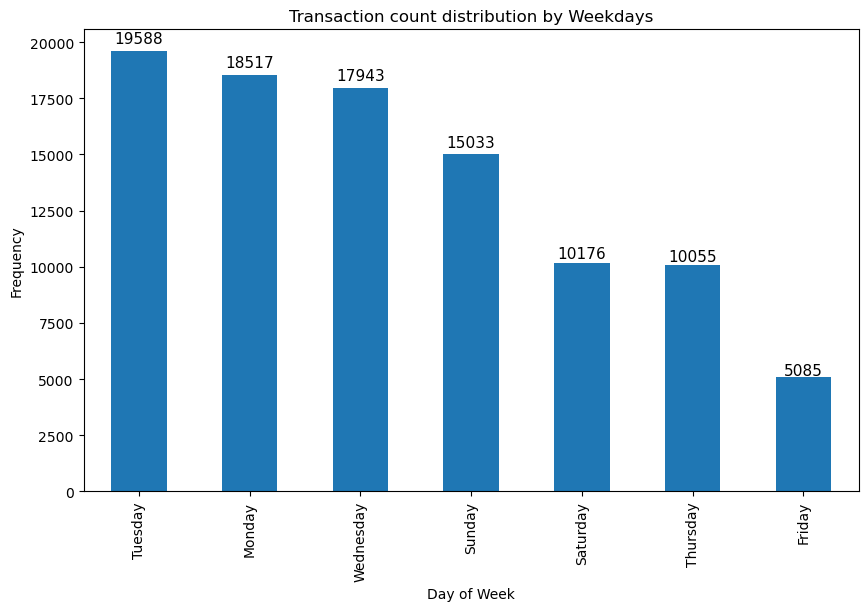

In [58]:
data.groupby(['DOW'])['Amount'].count().sort_values(ascending=False).plot(kind = 'bar')
for i,j in enumerate(data.groupby(['DOW'])['Amount'].count().sort_values(ascending=False)):
    plt.text(i,j*1.02,j,ha = 'center', fontsize = 11)
plt.title('Transaction count distribution by Weekdays')
plt.ylabel('Frequency')
plt.xlabel('Day of Week')
plt.show()

In [59]:
goods = data[data['Fraud'] == 0]
bads = data[data['Fraud'] == 1]
print("#goods:", len(goods), "    #bads:", len(bads))

#goods: 95338     #bads: 1059


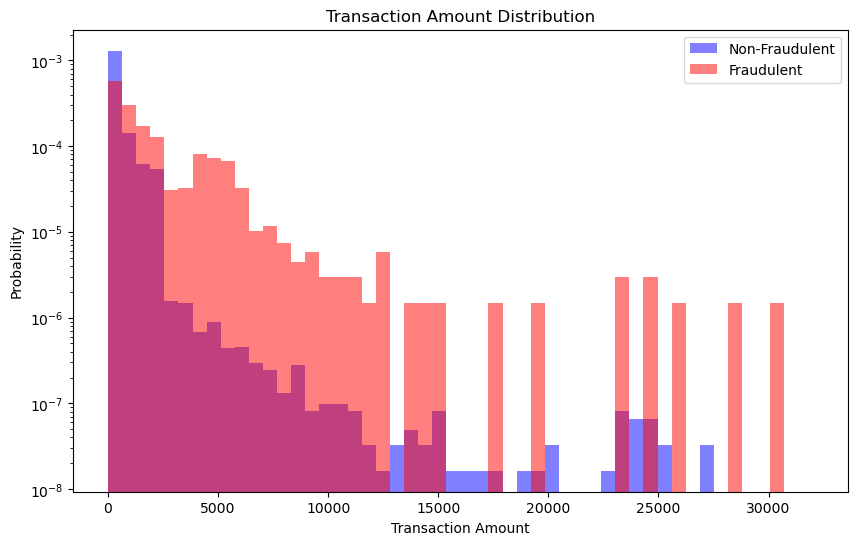

In [60]:
plt.hist(goods['Amount'],bins=50,range=[0,32000], density = True, color = 'blue', alpha = 0.5,linewidth=1.2)
plt.hist(bads['Amount'],bins=50,range=[0,32000], density = True, color = 'red', alpha = 0.5, linewidth=1.2)
plt.yscale('log')
plt.title('Transaction Amount Distribution')
plt.ylabel('Probability')
plt.xlabel('Transaction Amount')
plt.legend(('Non-Fraudulent', 'Fraudulent'), loc='upper right');

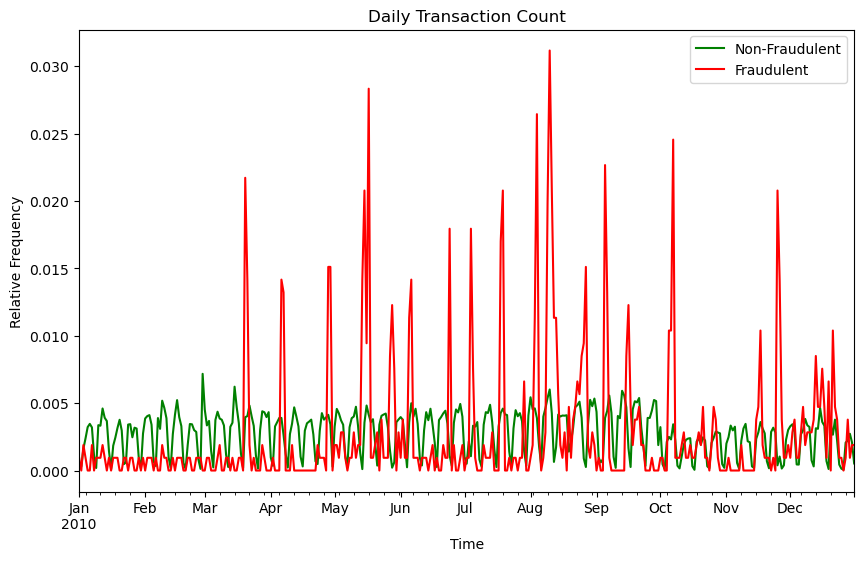

In [61]:
ngoods = len(goods)
goods_series = goods.set_index(goods['Date']).resample(timedelta(days = 1)).count()['Amount']
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Transactions', color = 'green')

nbads = len(bads)
bads_series = bads.set_index(bads['Date']).resample(timedelta(days = 1)).count()['Amount']
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

plt.xlabel('Time')
plt.ylabel('Relative Frequency')
plt.title('Daily Transaction Count')
plt.legend(('Non-Fraudulent', 'Fraudulent'), loc='upper right');

plt.show()

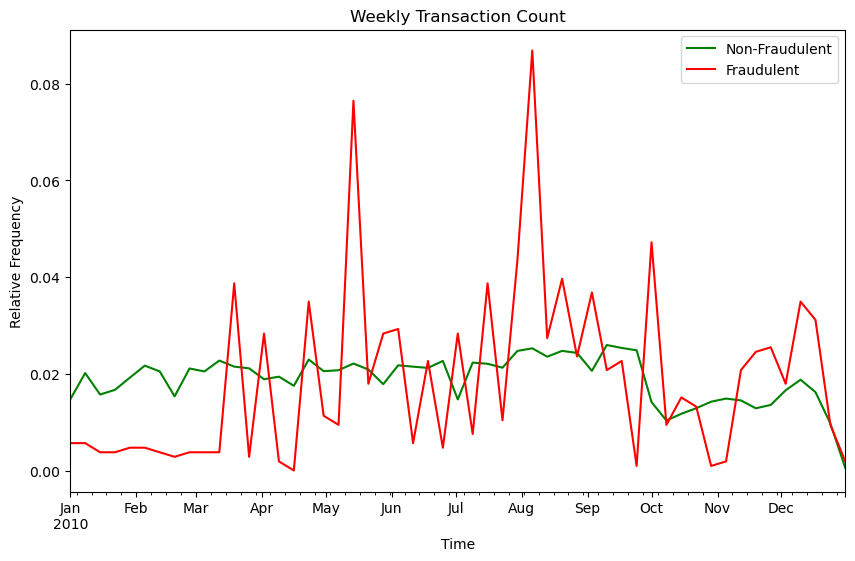

In [62]:
goods_series = goods.set_index(goods['Date']).resample(timedelta(days = 7)).count()['Amount']
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weekly Transactions', color = 'green')

bads_series = bads.set_index(bads['Date']).resample(timedelta(days = 7)).count()['Amount']
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

plt.xlabel('Time')
plt.ylabel('Relative Frequency')
plt.title('Weekly Transaction Count')
plt.legend(('Non-Fraudulent', 'Fraudulent'), loc='upper right')

plt.show()

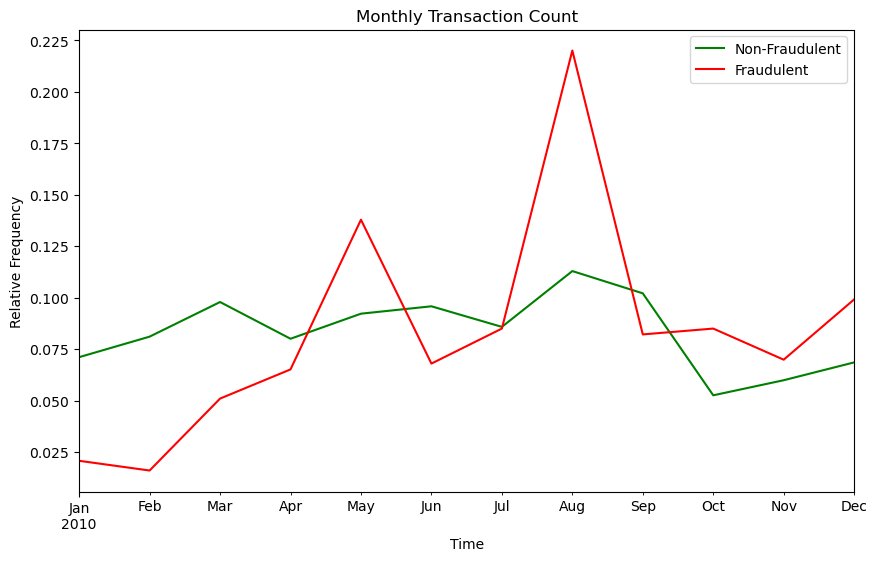

In [63]:
goods_monthly = goods.copy(deep=True)
goods_monthly['Month'] = goods_monthly['Date'].apply(lambda x: datetime.strftime(x, '%Y-%m'))
goods_monthly['Month'] = pd.to_datetime(goods_monthly['Month'])
goods_series = goods_monthly.groupby('Month')['Amount'].count()
# goods_series = goods.set_index(goods['Date']).resample(timedelta(days = 7)).count()['Amount']
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Monthly Transactions', color = 'green')

bads_monthly = bads.copy(deep=True)
bads_monthly['Month'] = bads_monthly['Date'].apply(lambda x: datetime.strftime(x, '%Y-%m'))
bads_monthly['Month'] = pd.to_datetime(bads_monthly['Month'])
bads_series = bads_monthly.groupby('Month')['Amount'].count()
# bads_series = bads.set_index(bads['Date']).resample(timedelta(days = 7)).count()['Amount']
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

plt.xlabel('Time')
plt.ylabel('Relative Frequency')
plt.title('Monthly Transaction Count')
plt.legend(('Non-Fraudulent', 'Fraudulent'), loc='upper right')

plt.show()

In [64]:
stop_time = datetime.now()
print('duration: ', stop_time - start_time)

duration:  0:00:05.752040
